## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az
import jax.numpy as jnp
import os

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
plt.rcParams['font.size'] = 5

In [4]:
# Parameters order
data_columns = ["exp","sex","no_edu","elementary_edu", "highschool_edu", "postsec_edu",
    "undergrad_edu", "graduate_edu", "age", "tenure", "union","public_sector", "self_emp"]

# parameters = ["avg_salary"] + [ f"beta_{var}" for var in data_columns ] + ["shape"]
parameters = ["avg_salary_ind","avg_salary_occ"] + [ f"beta_{var}_ind" for var in data_columns ] + [ f"beta_{var}_occ" for var in data_columns ]

## Check traces

In [5]:
# NOTE: Add legend with industry colors to the right (just one legend)

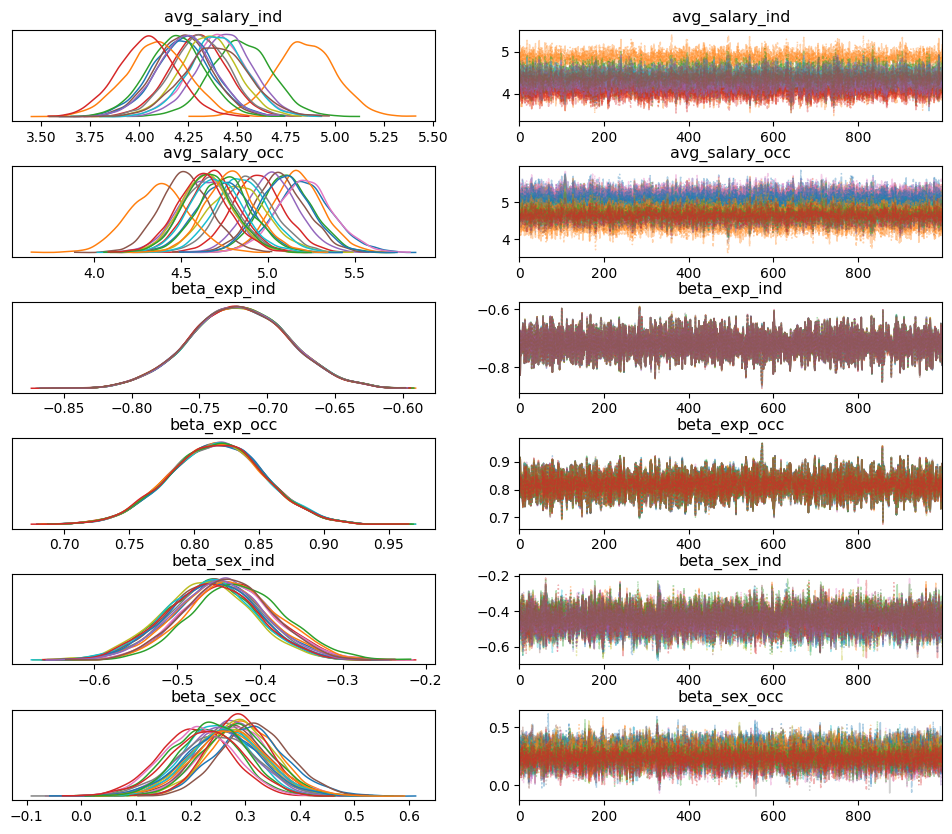

<Figure size 640x480 with 0 Axes>

In [11]:
model = "hierarchical-ind-occ"
vars = ["avg_salary_ind","avg_salary_occ", "beta_exp_ind","beta_exp_occ","beta_sex_ind","beta_sex_occ"]
axes = az.plot_trace(az.from_netcdf(f"../outputs/{model}/2007/trace.nc"), combined=True, figsize=(12, 10), var_names=vars);

# Get the figure from one of the axes
fig = axes[0][0].figure

# Adjust the margins
fig.subplots_adjust(hspace=0.5)

fig = plt.gcf()
plt.show()
plt.draw()
fig.savefig('../images/ch5_traces/trace_1.svg', format='svg')
fig.savefig('../images/ch5_traces/trace_1.pdf', format='pdf')

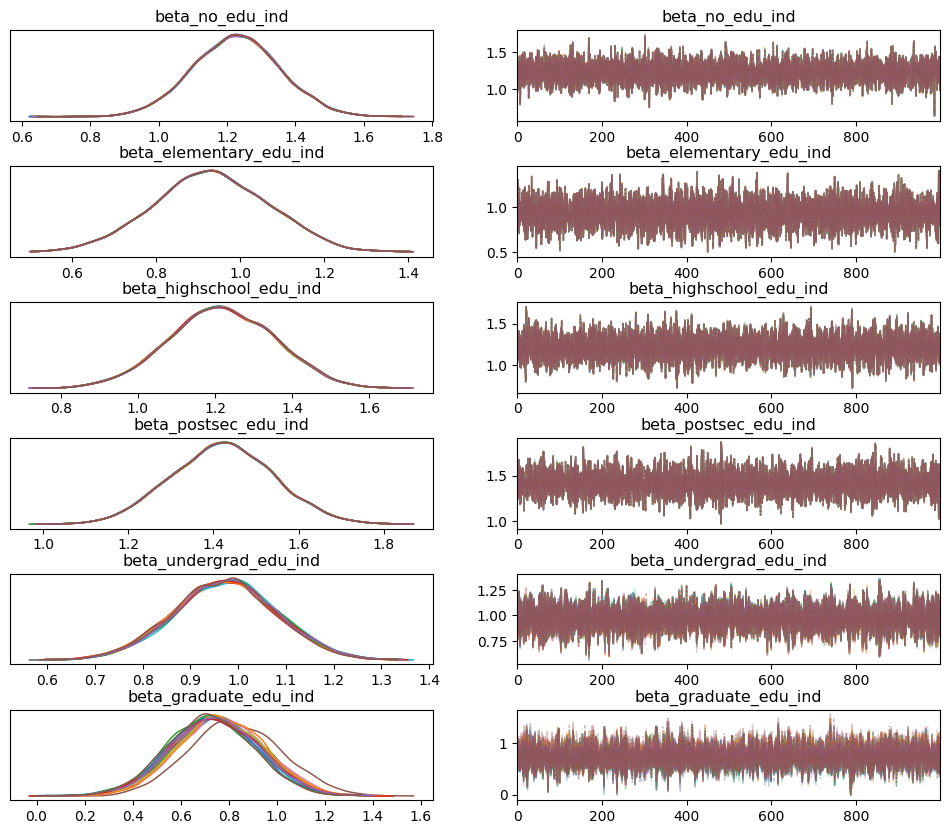

<Figure size 640x480 with 0 Axes>

In [12]:
model = "hierarchical-ind-occ"
vars = ["beta_no_edu_ind","beta_elementary_edu_ind", "beta_highschool_edu_ind","beta_postsec_edu_ind","beta_undergrad_edu_ind","beta_graduate_edu_ind"]
axes = az.plot_trace(az.from_netcdf(f"../outputs/{model}/2007/trace.nc"), combined=True, figsize=(12, 10), var_names=vars);

# Get the figure from one of the axes
fig = axes[0][0].figure

# Adjust the margins
fig.subplots_adjust(hspace=0.5)

fig = plt.gcf()
plt.show()
plt.draw()
fig.savefig('../images/ch5_traces/trace_2.svg', format='svg')
fig.savefig('../images/ch5_traces/trace_2.pdf', format='pdf')

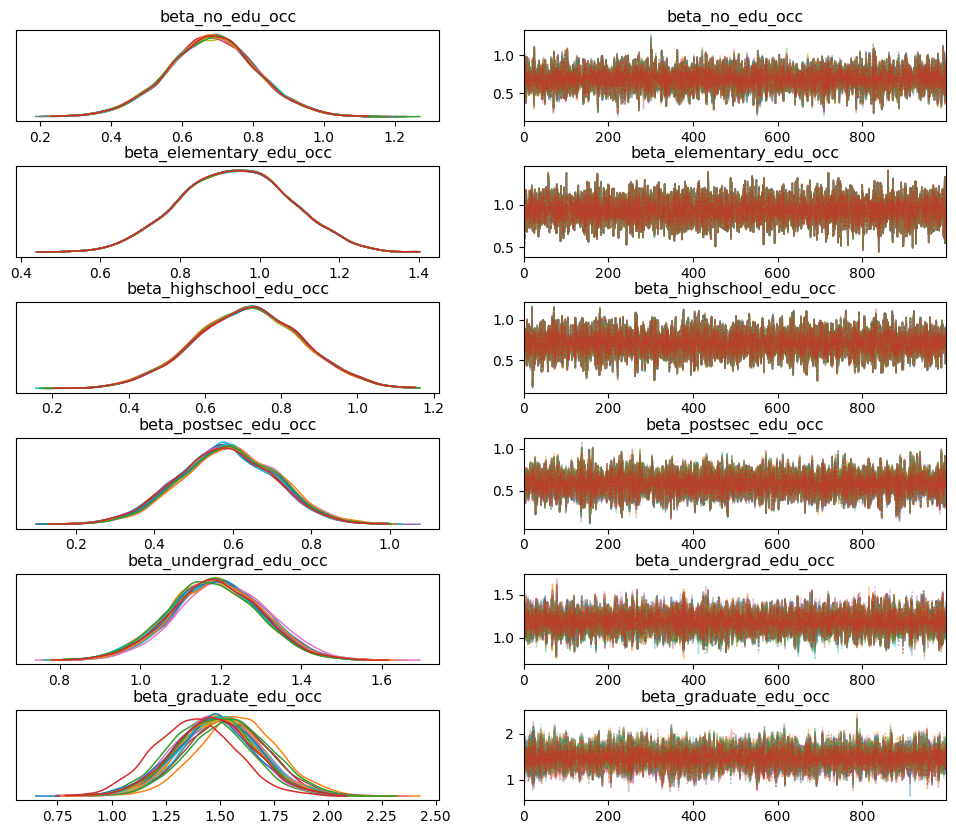

<Figure size 640x480 with 0 Axes>

In [13]:
model = "hierarchical-ind-occ"
vars = ["beta_no_edu_occ","beta_elementary_edu_occ", "beta_highschool_edu_occ","beta_postsec_edu_occ","beta_undergrad_edu_occ","beta_graduate_edu_occ"]
axes = az.plot_trace(az.from_netcdf(f"../outputs/{model}/2007/trace.nc"), combined=True, figsize=(12, 10), var_names=vars);

# Get the figure from one of the axes
fig = axes[0][0].figure

# Adjust the margins
fig.subplots_adjust(hspace=0.5)

fig = plt.gcf()
plt.show()
plt.draw()
fig.savefig('../images/ch5_traces/trace_3.svg', format='svg')
fig.savefig('../images/ch5_traces/trace_3.pdf', format='pdf')

In [8]:
az.summary(az.from_netcdf(f"../outputs/{model}/1996/trace.nc"), var_names=["beta_exp_occ"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta_exp_occ[senior management],0.103,0.270,-0.251,0.509,0.135,0.103,4.0,4.0,inf
beta_exp_occ[middle management],0.091,0.200,-0.216,0.340,0.100,0.076,4.0,4.0,19.63
beta_exp_occ[business/finance professional],0.121,0.196,-0.121,0.332,0.098,0.075,4.0,4.0,inf
beta_exp_occ[secretarial/administrative],0.121,0.293,-0.223,0.515,0.146,0.112,4.0,4.0,inf
beta_exp_occ[natural/sciences professional],-0.033,0.112,-0.200,0.106,0.056,0.043,4.0,4.0,inf
beta_exp_occ[technical specialist],-0.095,0.222,-0.395,0.230,0.111,0.085,4.0,4.0,inf
beta_exp_occ[health professional],-0.017,0.081,-0.109,0.075,0.040,0.031,4.0,4.0,inf
beta_exp_occ[health assistant],0.066,0.096,-0.052,0.182,0.048,0.036,4.0,4.0,inf
beta_exp_occ[teachers/professors],0.185,0.330,-0.196,0.703,0.165,0.126,4.0,4.0,inf
beta_exp_occ[government/religion services],0.027,0.220,-0.167,0.400,0.110,0.084,4.0,4.0,inf


In [ ]:
az.plot_autocorr(az.from_netcdf(f"../outputs/{model}/2005/trace.nc"), var_names=parameters);

## Compare models

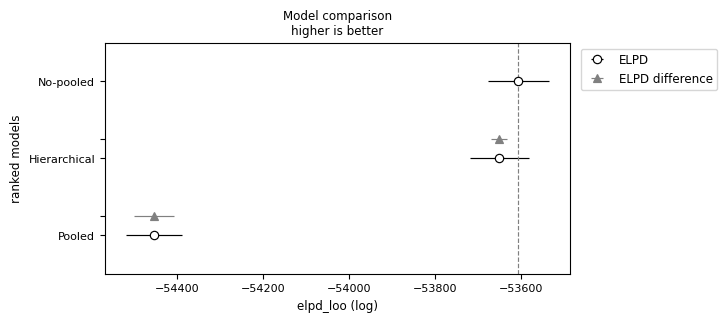

<Figure size 640x480 with 0 Axes>

In [6]:
# models = ["pooled", "pooled-reg", "no-pooled", "no-pooled-reg", "hierarchical", "hierarchical-reg", "hierarchical-ind-occ", "hierarchical-ind-occ(intercept)",
#           "hierarchical-lognormal"]
# models = ["pooled", "no-pooled", "hierarchical","hierarchical-ind-occ", "hierarchical-shape","hierarchical-ind-occ_orig"]
models = ["hierarchical", "no-pooled", "pooled"]
models_names = ["Hierarchical", "No-pooled", "Pooled"]
comparison = az.compare({ f"{models_names[models.index(model)]}": az.from_netcdf(f"../outputs/{model}/2007/trace.nc") for model in models})
# comparison = az.compare({ f"{model}": az.from_netcdf(f"/media/avena/Sandisk SDD/ouputs_thesis/{model}/2011/trace.nc") for model in models})
az.plot_compare(comparison, textsize=8);
fig = plt.gcf()
plt.show()
plt.draw()
fig.savefig('../images/ch5_model_structure_comparison/model_structure_comparison.svg', format='svg')
fig.savefig('../images/ch5_model_structure_comparison/model_structure_comparison.pdf', format='pdf')

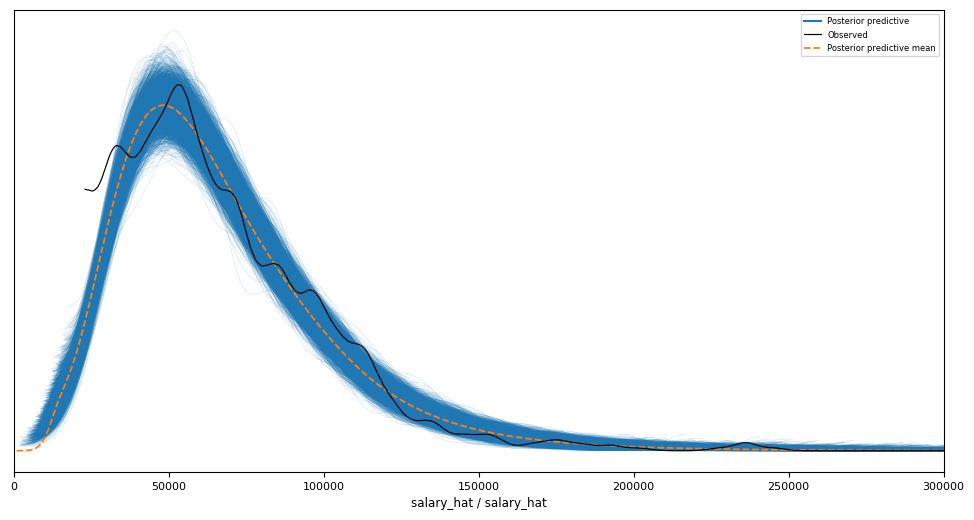

In [15]:
ax = az.plot_ppc(az.from_netcdf(f"../outputs/hierarchical-ind-occ/1996/trace.nc"), figsize=(12, 6), textsize=8);

ax.set_xlim(0, 300000);

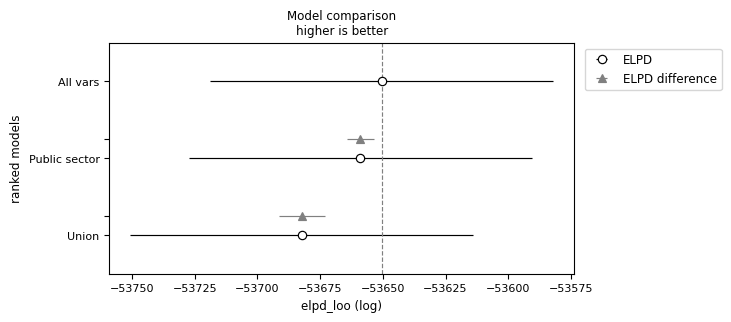

<Figure size 640x480 with 0 Axes>

In [9]:
models = ["hierarchical","VS1-no_self", "VS2-no_public"]
        #   "VS4-no_union", "VS5-no_tenure", "VS6-no_age", "VS7-no_edu", "VS8-no_sex", "VS9-no_exp"]
models_names = ["All vars","Public sector", "Union"]#, "Tenure", "Age", "Education", "Sex", "Experience", "Avg. salary"]
comparison = az.compare({ f"{models_names[models.index(model)]}": az.from_netcdf(f"../outputs/{model}/2007/trace.nc") for model in models})
az.plot_compare(comparison, textsize=8);

fig = plt.gcf()
plt.show()
plt.draw()
fig.savefig('../images/ch5_forward_sel/forward_sel.svg', format='svg')
fig.savefig('../images/ch5_forward_sel/forward_sel.pdf', format='pdf')

## Longitudinal Analysis

In [38]:
ind_cat = [
    'agriculture',
    'forestry/oil/mining',
    'utilities',
    'construction',
    'manufacturing',
    'trade',
    'transportation',
    'info/culture',
    'finance/real estate',
    'scientific/technical',
    'business support',
    'education',
    'health/social',
    'accommodation/food',
    'other services',
    'public admin']

In [109]:
industry = "scientific/technical"
id_ind = ind_cat.index(industry)
graduate = []
for year in range(1996, 2008):
    trace = az.from_netcdf(f"../outputs/hierarchical-ind-occ/{year}/trace.nc")
    graduate.append(trace.posterior["beta_graduate_edu_ind"].values[:,:,id_ind].flatten())

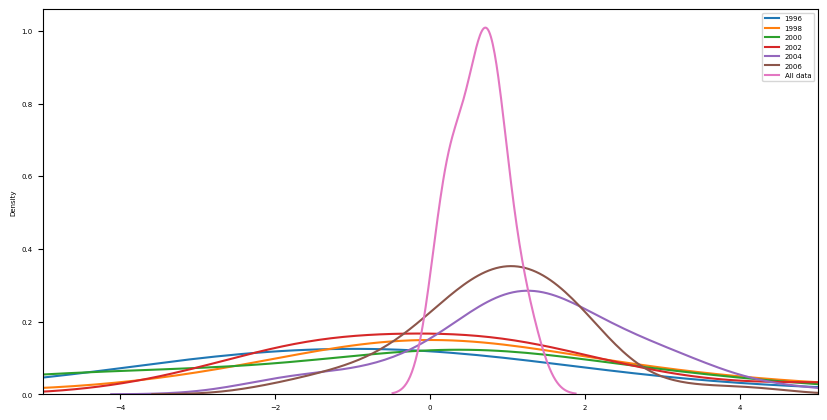

<Figure size 640x480 with 0 Axes>

In [120]:
fig, ax = plt.subplots(figsize=(10, 5))
for i, year in enumerate(range(1996, 2008, 2)):
    sns.kdeplot(np.random.choice(graduate[i],50), label=year)
sns.kdeplot(np.random.choice(graduate[9],10), label="All data")
ax.set_xlim(-5, 5)
plt.legend()    
plt.show()

plt.draw()
fig.savefig('../images/ch5_online_learning/online_learning_grad.svg', format='svg')
fig.savefig('../images/ch5_online_learning/online_learning_grad.pdf', format='pdf')

In [111]:
industry = "scientific/technical"
id_ind = ind_cat.index(industry)
avg_sal = []
for year in range(1996, 2008):
    trace = az.from_netcdf(f"../outputs/hierarchical-ind-occ/{year}/trace.nc")
    avg_sal.append(trace.posterior["avg_salary_ind"].values[:,:,id_ind].flatten())

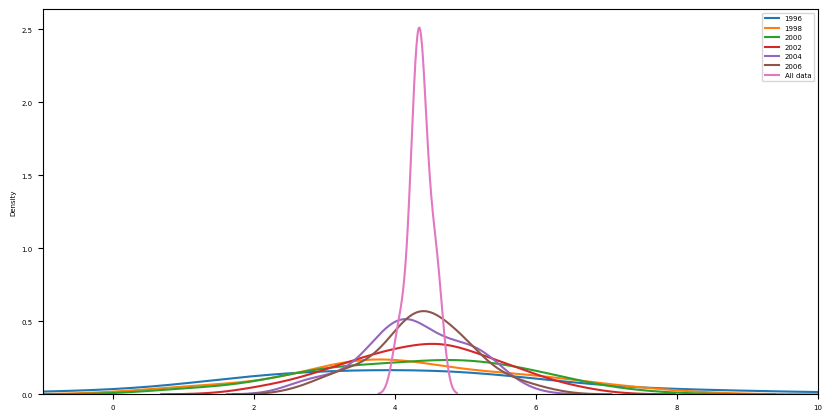

<Figure size 640x480 with 0 Axes>

In [121]:
fig, ax = plt.subplots(figsize=(10, 5))
for i, year in enumerate(range(1996, 2008, 2)):
    sns.kdeplot(np.random.choice(avg_sal[i],50), label=year)
sns.kdeplot(np.random.choice(avg_sal[9],10), label="All data")
ax.set_xlim(-1, 10)
plt.legend()    
plt.show()

plt.draw()
fig.savefig('../images/ch5_online_learning/online_learning_salary.svg', format='svg')
fig.savefig('../images/ch5_online_learning/online_learning_salary.pdf', format='pdf')

In [116]:
industry = "scientific/technical"
id_ind = ind_cat.index(industry)
gender = []
for year in range(1996, 2008):
    trace = az.from_netcdf(f"../outputs/hierarchical-ind-occ/{year}/trace.nc")
    gender.append(trace.posterior["beta_sex_ind"].values[:,:,id_ind].flatten())

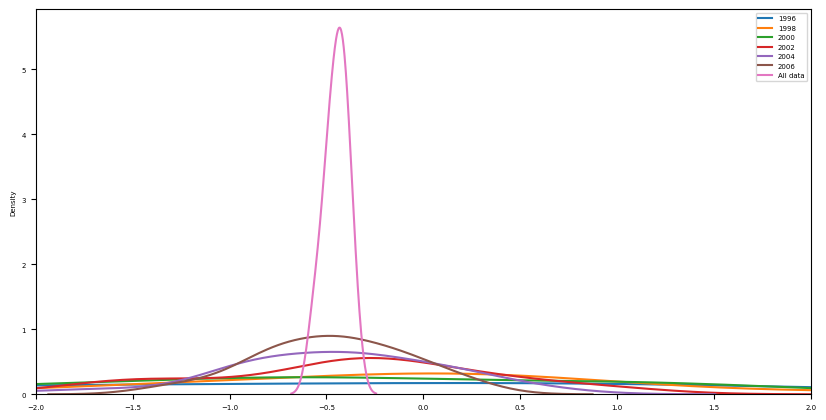

<Figure size 640x480 with 0 Axes>

In [122]:
fig, ax = plt.subplots(figsize=(10, 5))
for i, year in enumerate(range(1996, 2008, 2)):
    sns.kdeplot(np.random.choice(gender[i],50), label=year)
sns.kdeplot(np.random.choice(gender[9],10), label="All data")
ax.set_xlim(-2, 2)
plt.legend()    
plt.show()

plt.draw()
fig.savefig('../images/ch5_online_learning/online_learning_gender.svg', format='svg')
fig.savefig('../images/ch5_online_learning/online_learning_gender.pdf', format='pdf')

## Posterior predictive checks

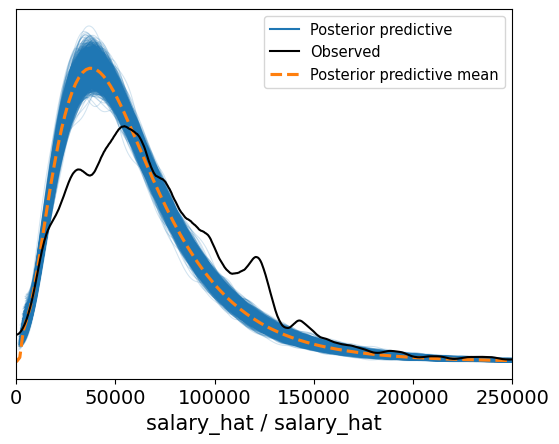

In [12]:
model = "hierarchical"
ax = az.plot_ppc(az.from_netcdf(f"../outputs/{model}/2011/trace.nc"));
ax.set_xlim(0, 250000);

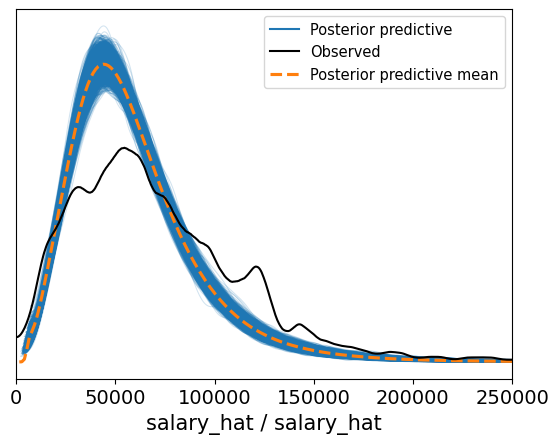

In [13]:
model = "hierarchical-shape10"
ax = az.plot_ppc(az.from_netcdf(f"../outputs/{model}/2011/trace.nc"));
ax.set_xlim(0, 250000);

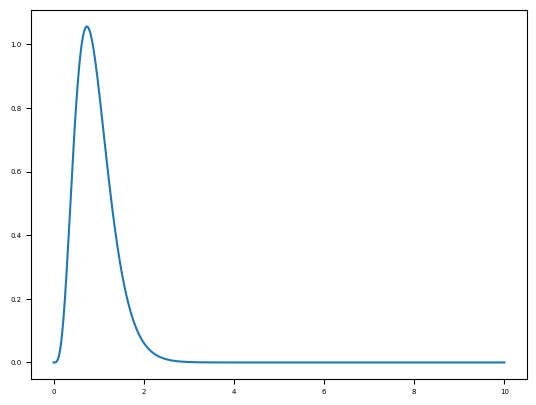

In [16]:
# Create gamma distribution with shape 1 and scale 0.5 using numpy
from scipy.stats import gamma
x = np.linspace(0, 10, 1000)
y = gamma.pdf(x, a=5, scale=2/10.81)
plt.plot(x, y, label="Gamma(1, 0.5)")

In [13]:
np.log(50000)

10.819778284410283